## Linear Regression 

In [159]:
# importing all libries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import json

### Problem Statement

In [2]:
# predicteing the price of cars on the basis of cars features

### Data Gathering

In [3]:
# we are taking the data from client server 
df=pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,...,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [5]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


### EDA(explotary DatA analysis)

In [6]:
# frist of you have to check the null value present or not
df.isna().sum()
# there is no null values but in actual we have null values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
# we are going with one by one column analysis the all column 

## 1.symboling

In [9]:
# any null values
df["symboling"].isna().sum()

0

In [10]:
# checke the unique value
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
# checke the unique value count
df["symboling"].nunique()

6

In [12]:
# value count of the particular column with respective unique values
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

## 2.normalized-losses

In [13]:
df["normalized-losses"].isna().sum()

0

In [14]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [15]:
df["normalized-losses"].nunique()

52

In [16]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [17]:
df.replace({"?":np.nan},inplace=True)

In [18]:
df["normalized-losses"].isna().sum()

41

In [19]:
df["normalized-losses"].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [20]:
df["normalized-losses"].nunique()

51

In [21]:
df["normalized-losses"].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [22]:
df["normalized-losses"].fillna(df["normalized-losses"].median(),inplace=True)

In [23]:
df["normalized-losses"].isna().sum()

0

In [24]:
df["normalized-losses"]=df["normalized-losses"].astype(int)

### 3.make()

In [25]:
df["make"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [26]:
df["make"].isna().sum()

0

In [27]:
df["make"].nunique()

22

### 4. fuel-type

In [28]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [29]:
df["fuel-type"].nunique()

2

In [30]:
df["fuel-type"].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [31]:
fuel_type_value={'gas': 1, 'diesel': 0}
fuel_type_value

{'gas': 1, 'diesel': 0}

In [32]:
# we can do lable encoding here on ordinal data
df["fuel-type"].replace({'gas': 1, 'diesel': 0},inplace=True)

In [33]:
df["fuel-type"].value_counts()

1    185
0     20
Name: fuel-type, dtype: int64

### 5.aspiration

In [34]:
# when you dont konw how togive the prefrence try to ask your seniors
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [35]:
df["aspiration"].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [36]:
aspiration_value={'std': 0, 'turbo': 1}

In [37]:
df["aspiration"].isna().sum()

0

In [38]:
# lable encodig on ordinal data
df["aspiration"].replace({'std': 0, 'turbo': 1},inplace=True)

In [39]:
df["aspiration"].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

### 6.num-of-doors

In [40]:
df["num-of-doors"]

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [41]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

#### when you got an data as catogorical but it naming in number at that time you have to replace it number

In [42]:
df["num-of-doors"].value_counts().to_dict()

{'four': 114, 'two': 89}

In [43]:
num_of_doors_value={'four': 4, 'two': 2}

In [44]:
df["num-of-doors"].replace({'four': 4, 'two': 2},inplace=True)

In [45]:
df["num-of-doors"].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [46]:
df["num-of-doors"].isna().sum()

2

In [47]:
df["num-of-doors"].fillna(df["num-of-doors"].median(),inplace=True)

In [48]:
df["num-of-doors"]=df["num-of-doors"].astype(int)

In [49]:
df["num-of-doors"]

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num-of-doors, Length: 205, dtype: int32

### 7.body-style

In [50]:
df["body-style"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [51]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [52]:
## here are nominal data are persent we are using the get_dummies fumction

In [53]:
df=pd.get_dummies(df,columns=["body-style"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,alfa-romero,1,0,2,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115,alfa-romero,1,0,2,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115,alfa-romero,1,0,2,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,1,0,4,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,1,0,4,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4,rwd,front,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95,volvo,1,1,4,rwd,front,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95,volvo,1,0,4,rwd,front,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95,volvo,0,1,4,rwd,front,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


### 8.drive-wheels 

In [54]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [55]:
df["drive-wheels"].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [56]:
df["drive-wheels"].isna().sum()

0

In [57]:
# we can do here lable encoding
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [58]:
df["drive-wheels"]

0      1
1      1
2      1
3      0
4      2
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

In [59]:
drive_wheels_value={'fwd': 0, 'rwd': 1, '4wd': 2}

### 9.engine-location 

In [60]:
df["engine-location"]

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: engine-location, Length: 205, dtype: object

In [61]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [62]:
df["engine-location"].isna().sum()

0

In [63]:
df["engine-location"].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [64]:
df["engine-location"].replace({'front': 1, 'rear': 0},inplace=True)

### 10.wheel-base 

In [65]:
df["wheel-base"]

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [66]:
df["wheel-base"].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [67]:
df["wheel-base"].isna().sum()

0

### 11.Lenght

In [68]:
df["length"]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64

In [69]:
df["length"].isna().sum()

0

### 12 width

In [70]:
df["width"].isna().sum()

0

### 13.height

In [71]:
df["height"].isna().sum()

0

### 14.engine-type

In [72]:
df["engine-type"]

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [73]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [74]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [75]:
df["engine-type"].isna().sum()

0

In [76]:
df=pd.get_dummies(df,columns=["engine-type"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,alfa-romero,1,0,2,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115,alfa-romero,1,0,2,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115,alfa-romero,1,0,2,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164,audi,1,0,4,0,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164,audi,1,0,4,2,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,volvo,1,1,4,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,volvo,1,0,4,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,volvo,0,1,4,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


### 15.curb-weight

In [77]:
df["curb-weight"]

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: int64

In [78]:
df["curb-weight"].isna().sum()

0

### 16.num-of-cylinders 

In [79]:
df["num-of-cylinders"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [80]:
df["num-of-cylinders"].isna().sum()

0

In [81]:
df["num-of-cylinders"].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [82]:
df["num-of-cylinders"].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12},inplace=True)

#### 17.engine-size

In [83]:
df["engine-size"]

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 205, dtype: int64

In [84]:
df["engine-size"].isna().sum()

0

### 18.fuel-system

In [85]:
df["fuel-system"]

0      mpfi
1      mpfi
2      mpfi
3      mpfi
4      mpfi
       ... 
200    mpfi
201    mpfi
202    mpfi
203     idi
204    mpfi
Name: fuel-system, Length: 205, dtype: object

In [86]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [87]:
df["fuel-system"].value_counts().to_dict()

{'mpfi': 94,
 '2bbl': 66,
 'idi': 20,
 '1bbl': 11,
 'spdi': 9,
 '4bbl': 3,
 'mfi': 1,
 'spfi': 1}

In [88]:
df=pd.get_dummies(df,columns=["fuel-system"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,alfa-romero,1,0,2,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115,alfa-romero,1,0,2,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115,alfa-romero,1,0,2,1,1,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,2,164,audi,1,0,4,0,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,164,audi,1,0,4,2,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,volvo,1,1,4,1,1,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,volvo,1,0,4,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,volvo,0,1,4,1,1,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0


### 19.bore

In [89]:
df["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [90]:
df["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: bore, dtype: int64

In [91]:
df["bore"].isna().sum()

4

In [92]:
#handelinf the missing values
df["bore"].fillna(df["bore"].median(),inplace=True)

In [93]:
df["bore"]=df["bore"].astype(float)

#### 20.stroke

In [94]:
df["stroke"]

0      2.68
1      2.68
2      3.47
3       3.4
4       3.4
       ... 
200    3.15
201    3.15
202    2.87
203     3.4
204    3.15
Name: stroke, Length: 205, dtype: object

In [95]:
df["stroke"].isna().sum()

4

In [96]:
df["stroke"].fillna(df["stroke"].median(),inplace=True)


In [97]:
df["stroke"]=df["stroke"].astype(float)

### 21.compression-ratio

In [98]:
df["compression-ratio"]

0       9.0
1       9.0
2       9.0
3      10.0
4       8.0
       ... 
200     9.5
201     8.7
202     8.8
203    23.0
204     9.5
Name: compression-ratio, Length: 205, dtype: float64

In [99]:
df["compression-ratio"].isna().sum()

0

### 22.horsepower

In [100]:
df["horsepower"]

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [101]:
df["horsepower"].isna().sum()

2

In [102]:
df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

In [103]:
df["horsepower"]=df["horsepower"].astype(float)

### 23.peak-rpm 

In [104]:
df["peak-rpm"]

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [105]:
df["peak-rpm"].isna().sum()

2

In [106]:
df["peak-rpm"].fillna(df["peak-rpm"].median(),inplace=True)
df["peak-rpm"]=df["peak-rpm"].astype(float)

### 24.price

In [107]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [108]:
df["price"].isna().sum()

4

In [109]:
df["price"].fillna(df["price"].median(),inplace=True)
df["price"]=df["price"].astype(float)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int32  
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [111]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
fuel-system_1bbl    

### feature selection

#### 1.Checke Linirity

In [112]:
# we have to check the correletion betwwen the independent variable and the dependent varibale
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,-0.111150,-0.212471,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,0.133824,0.021510,-0.073709,-0.006837,0.058378,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,-0.051874,-0.040070,-0.308346,-0.212679,-0.233880,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,0.153897,0.057191,0.257611,0.234539,0.300567,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.003230,0.139129,0.439635,0.385675,0.197735,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
drive-wheels,-0.111150,0.133824,-0.051874,0.153897,-0.003230,1.000000,-0.113823,0.366828,0.416076,0.376554,...,0.139453,0.131758,-0.188341,-0.310901,0.113823,0.051874,-0.055378,0.369782,-0.128419,0.065393
engine-location,-0.212471,0.021510,-0.040070,0.057191,0.139129,-0.113823,1.000000,0.187790,0.050989,0.051698,...,0.031711,0.017192,0.029019,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheel-base,-0.531954,-0.073709,-0.308346,0.257611,0.439635,0.366828,0.187790,1.000000,0.874587,0.795144,...,0.166152,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
length,-0.357612,-0.006837,-0.212679,0.234539,0.385675,0.416076,0.050989,0.874587,1.000000,0.841118,...,0.244053,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
width,-0.232919,0.058378,-0.233880,0.300567,0.197735,0.376554,0.051698,0.795144,0.841118,1.000000,...,0.348869,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158


<AxesSubplot:>

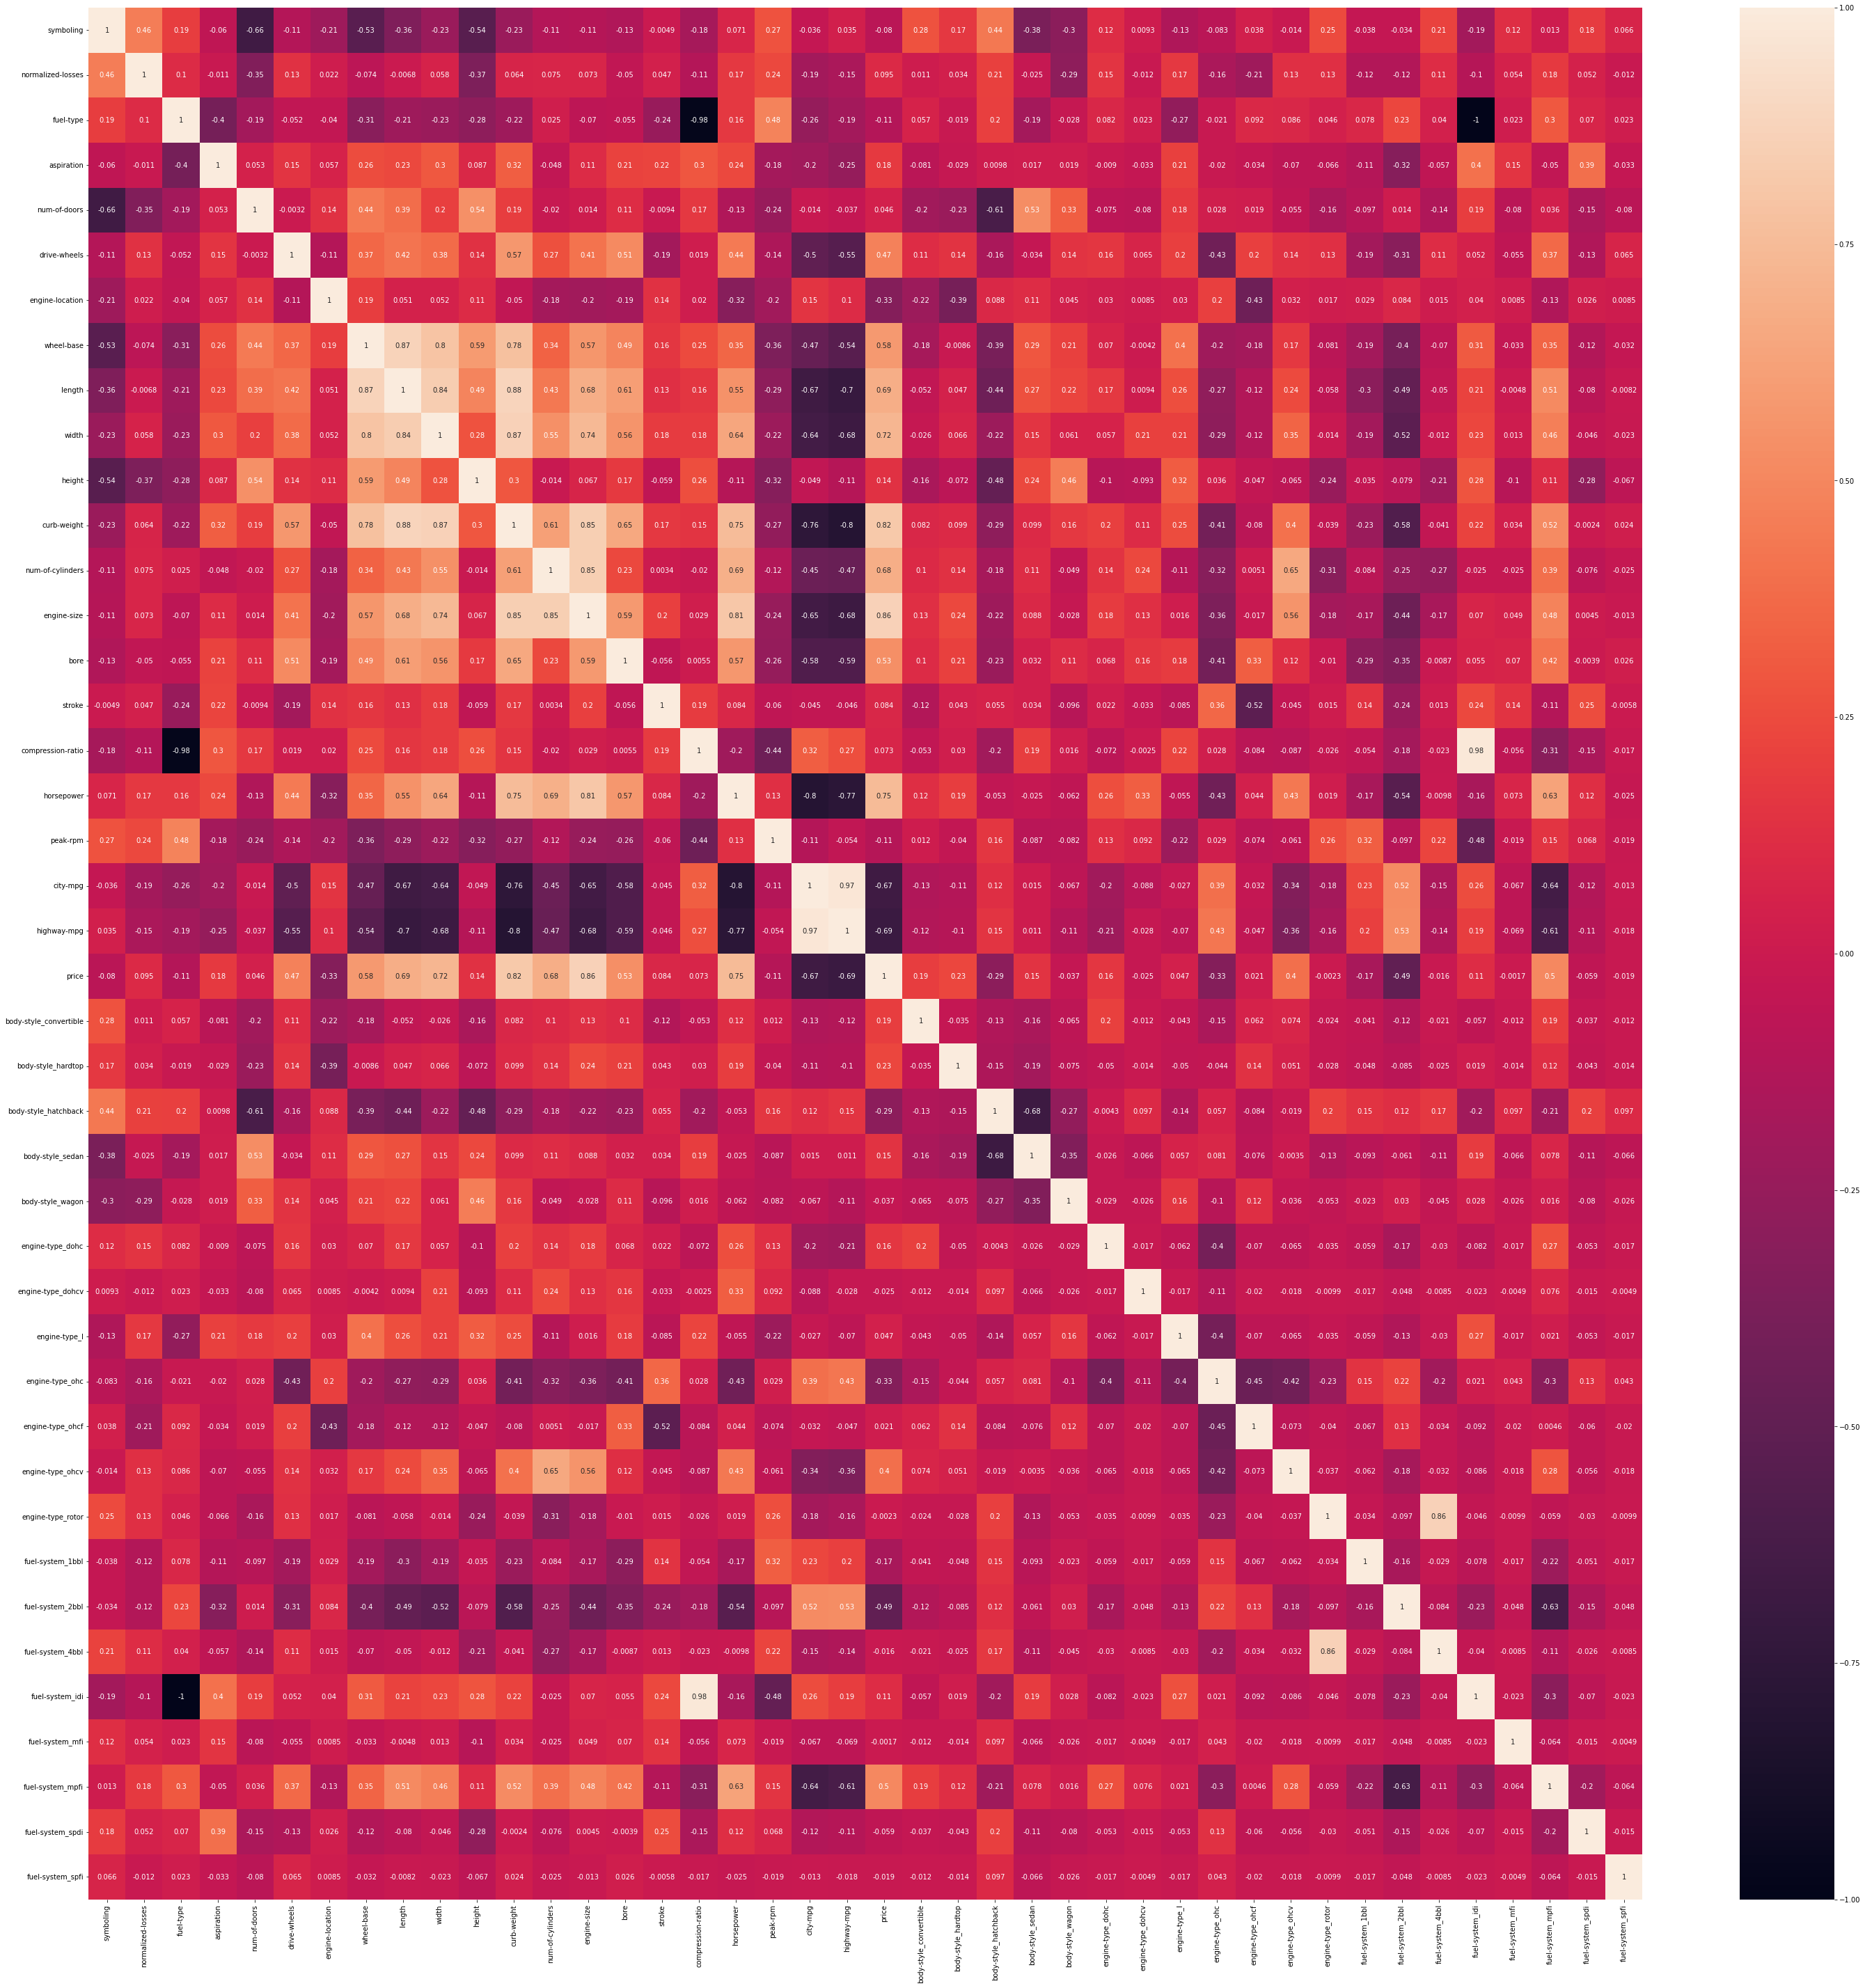

In [113]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)

#### 2. No Multicolinirity

In [114]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,-0.111150,-0.212471,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,0.133824,0.021510,-0.073709,-0.006837,0.058378,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,-0.051874,-0.040070,-0.308346,-0.212679,-0.233880,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,0.153897,0.057191,0.257611,0.234539,0.300567,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.003230,0.139129,0.439635,0.385675,0.197735,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
drive-wheels,-0.111150,0.133824,-0.051874,0.153897,-0.003230,1.000000,-0.113823,0.366828,0.416076,0.376554,...,0.139453,0.131758,-0.188341,-0.310901,0.113823,0.051874,-0.055378,0.369782,-0.128419,0.065393
engine-location,-0.212471,0.021510,-0.040070,0.057191,0.139129,-0.113823,1.000000,0.187790,0.050989,0.051698,...,0.031711,0.017192,0.029019,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheel-base,-0.531954,-0.073709,-0.308346,0.257611,0.439635,0.366828,0.187790,1.000000,0.874587,0.795144,...,0.166152,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
length,-0.357612,-0.006837,-0.212679,0.234539,0.385675,0.416076,0.050989,0.874587,1.000000,0.841118,...,0.244053,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
width,-0.232919,0.058378,-0.233880,0.300567,0.197735,0.376554,0.051698,0.795144,0.841118,1.000000,...,0.348869,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158


In [115]:
df=df.select_dtypes(exclude=object)
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,1,0,2,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115,1,0,2,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115,1,0,2,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164,1,0,4,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,0,4,2,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,0,4,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,1,1,4,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,1,0,4,1,1,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,0,1,4,1,1,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


## train_test_split()

In [116]:
x=df.drop("price",axis=1)
y=df["price"]
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,1,0,2,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115,1,0,2,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115,1,0,2,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164,1,0,4,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,0,4,2,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,0,4,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,1,1,4,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,1,0,4,1,1,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,0,1,4,1,1,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [118]:
x_train

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
136,3,150,1,1,2,0,1,99.1,186.6,66.5,...,0,0,0,0,0,0,0,1,0,0
143,0,102,1,0,4,0,1,97.2,172.0,65.4,...,0,0,0,0,0,0,0,1,0,0
101,0,128,1,0,4,0,1,100.4,181.7,66.5,...,1,0,0,0,0,0,0,1,0,0
190,3,256,1,0,2,0,1,94.5,165.7,64.0,...,0,0,0,0,0,0,0,1,0,0
1,3,115,1,0,2,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,164,1,0,4,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
130,0,115,1,0,4,0,1,96.1,181.5,66.5,...,0,0,0,0,0,0,0,1,0,0
134,3,150,1,0,2,0,1,99.1,186.6,66.5,...,0,0,0,0,0,0,0,1,0,0
155,0,91,1,0,4,2,1,95.7,169.7,63.6,...,0,0,0,1,0,0,0,0,0,0


In [119]:
x_test

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
32,1,101,1,0,2,0,1,93.7,150.0,64.0,...,0,0,1,0,0,0,0,0,0,0
6,1,158,1,0,4,0,1,105.8,192.7,71.4,...,0,0,0,0,0,0,0,1,0,0
135,2,104,1,0,4,0,1,99.1,186.6,66.5,...,0,0,0,0,0,0,0,1,0,0
124,3,115,1,1,2,1,1,95.9,173.2,66.3,...,0,0,0,0,0,0,0,0,1,0
11,0,192,1,0,4,1,1,101.2,176.8,64.8,...,0,0,0,0,0,0,0,1,0,0
55,3,150,1,0,2,1,1,95.3,169.0,65.7,...,0,1,0,0,1,0,0,0,0,0
61,1,129,1,0,2,0,1,98.8,177.8,66.5,...,0,0,0,1,0,0,0,0,0,0
122,1,154,1,0,4,0,1,93.7,167.3,63.8,...,0,0,0,1,0,0,0,0,0,0
156,0,91,1,0,4,0,1,95.7,166.3,64.4,...,0,0,0,1,0,0,0,0,0,0
7,1,115,1,0,4,0,1,105.8,192.7,71.4,...,0,0,0,0,0,0,0,1,0,0


### model training

In [121]:
model=LinearRegression()

#### fit the model

In [122]:
model.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pre=model.predict(x_test)
y_pre[20:30]

array([15587.74405097,  6921.70510693,  6976.54284267, 12687.1919392 ,
        6139.68924994,  7302.64094909, 10046.76031568, 26550.81413367,
       10859.637197  ,  9292.11799032])

In [124]:
y_test

32      5399.0
6      17710.0
135    15510.0
124    12764.0
11     16925.0
55     10945.0
61     10595.0
122     7609.0
156     6938.0
7      18920.0
31      6855.0
21      5572.0
62     10245.0
108    13200.0
200    16845.0
150     5348.0
126    32528.0
168     9639.0
191    13295.0
149    11694.0
197    16515.0
157     7198.0
154     7898.0
171    11549.0
139     7053.0
92      6849.0
193    12290.0
16     41315.0
185     8195.0
175     9988.0
90      7099.0
23      7957.0
86      8189.0
131     9895.0
120     6229.0
192    13845.0
77      6189.0
29     12964.0
165     9298.0
113    16695.0
94      7299.0
Name: price, dtype: float64

#### model evalution

In [125]:
Residule=y_pre-y_test
print("The residule is:",Residule)

The residule is: 32       757.902753
6       2796.929535
135    -2349.236916
124     1687.817453
11     -3372.051829
55      1792.404513
61      -378.982363
122      769.958126
156     1068.274684
7       -156.279433
31      -202.946309
21       441.088800
62      1789.264446
108     5466.059528
200     2066.837588
150     1627.807467
126     1350.351138
168     3786.663564
191     2387.776128
149     -836.496380
197     -927.255949
157     -276.294893
154     -921.457157
171     1138.191939
139     -913.310750
92       453.640949
193    -2243.239684
16    -14764.185866
185     2664.637197
175     -695.882010
90      2031.407669
23       753.923957
86      2643.102384
131     -938.913796
120      412.694884
192    -3134.357538
77       990.325288
29      3585.146655
165     -315.550953
113     -425.872846
94      -556.304092
Name: price, dtype: float64


In [126]:
#Evalution on testing data
y_pre=model.predict(x_test)

mse=mean_squared_error(y_pre,y_test)
print("MSE :",mse)

RMSE=np.sqrt(mse)
print("RMSE :",RMSE)

mae=mean_absolute_error(y_pre,y_test)
print("MAE :",mae)

r2=r2_score(y_pre,y_test)
print("R2 squre :",r2)


MSE : 8969524.036855038
RMSE : 2994.9163655860307
MAE : 1850.5079368262714
R2 squre : 0.732775772076109


In [127]:
#Evalution on training data
y_pre_train=model.predict(x_train)

mse=mean_squared_error(y_pre_train,y_train)
print("MSE :",mse)

RMSE=np.sqrt(mse)
print("RMSE :",RMSE)

mae=mean_absolute_error(y_pre_train,y_train)
print("MAE :",mae)

r2=r2_score(y_pre_train,y_train)
print("R2 squre :",r2)


MSE : 4851497.712700087
RMSE : 2202.6115664592535
MAE : 1631.8297721806898
R2 squre : 0.9190191706881988


In [129]:
# by comparing the both two result on testing and training on the dataset
#we can say our model get overfitted

## Testing on the single row

In [132]:
# list of columns
columns_names=x.columns
columns_names
print(columns_names)

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')


In [137]:
x.head(1).T

,0
symboling,3.00
normalized-losses,115.00
fuel-type,1.00
aspiration,0.00
num-of-doors,2.00
drive-wheels,1.00
engine-location,1.00
wheel-base,88.60
length,168.80
width,64.10


In [146]:
# values enter by the user
symboling=3.00
normalized_losses=115.00
fuel_type="gas"
aspiration="turbo"
num_of_doors="four"
drive_wheels="4wd"
engine_location=1.00
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
num_of_cylinders=4.00
engine_size=130.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00

# one hot encoded values
body_style="sedan"
engine_type="dohc"
fuel_system="mpfi"

In [147]:
print(fuel_type_value)
print(aspiration_value)
print(num_of_doors_value)
print(drive_wheels_value)

{'gas': 1, 'diesel': 0}
{'std': 0, 'turbo': 1}
{'four': 4, 'two': 2}
{'fwd': 0, 'rwd': 1, '4wd': 2}


In [161]:
### making dict of all data as a project data
project_data={"fuel_type":fuel_type_value,"aspiration":aspiration_value,
              "num_of_doors":num_of_doors_value,"drive_wheels":drive_wheels_value,
             "column":list(columns_names)}

In [162]:
project_data

{'fuel_type': {'gas': 1, 'diesel': 0},
 'aspiration': {'std': 0, 'turbo': 1},
 'num_of_doors': {'four': 4, 'two': 2},
 'drive_wheels': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'column': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'engine-type_dohc',
  'engine-type_dohcv',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'engine-type_rotor',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi',
  'fuel-system_spdi',
  'fuel-system_spfi']}

In [163]:
# defining the columns name
body_style_col="body-style_" + body_style
engine_type_col="engine-type_" + engine_type
fuel_system_col="fuel-system_" + fuel_system
print(body_style_col)
print(engine_type_col)
print(fuel_system_col)

body-style_sedan
engine-type_dohc
fuel-system_mpfi


In [164]:
columns_names

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_dohcv',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [165]:
## finding the index number
body_style_index=np.where(columns_names==body_style_col)[0][0]
engine_type_index=np.where(columns_names==engine_type_col)[0][0]
fuel_system_index=np.where(columns_names==fuel_system_col)[0][0]
print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

24
26
38


In [166]:
array=np.zeros(len(columns_names),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [167]:
array[0]=symboling
array[1]=normalized_losses
array[2]=fuel_type_value[fuel_type]
array[3]=aspiration_value[aspiration]
array[4]=num_of_doors_value[num_of_doors]
array[5]=drive_wheels_value[drive_wheels]
array[6]=engine_location
array[7]=wheel_base
array[8]=length
array[9]=width
array[10]=curb_weight
array[11]=num_of_cylinders
array[12]=engine_size
array[13]=bore
array[14]=stroke
array[15]=compression_ratio
array[16]=horsepower
array[17]=peak_rpm
array[18]=city_mpg
array[19]=highway_mpg

# one hot encoded
array[body_style_index]=1
array[engine_type_index]=1
array[fuel_system_index]=1
array

array([   3,  115,    1,    1,    4,    2,    1,   88,  168,   64, 2548,
          4,  130,    3,    2,    9,  111, 5000,   21,   27,    0,    0,
          0,    0,    1,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0])

In [168]:
predictes_price_of_car=model.predict([array])[0]
print("The price of car",predictes_price_of_car)

The price of car 520845.16131861473


In [169]:
import pickle

In [170]:
with open("linear_reg.pkl","wb") as f:
    pickle.dump(model,f)

In [171]:
### pickeling project_data
with open("project_data.json","w") as f:
    json.dump(project_data,f)